In [1]:
#Run the following code to print multiple outputs from a cell
get_ipython().ast_node_interactivity = 'all'

# Neural Networks

## Importing & Setting up the Data
Import the file, "creditCardDefaultReduced.csv", and save it in a variable called `df`. 

In [2]:
import pandas as pd
df = pd.read_csv("creditCardDefaultReduced.csv")
df

,Limit_Bal,Education,Marriage,Age,Pay_0,Bill_Amt1,Pay_Amt1,Payment,Card
0,20000,University,married,24,Delay2,3913,0,Missed,Normal
1,120000,University,single,26,ontime,2682,0,Missed,Normal
2,90000,University,single,34,Delay0,29239,1518,Paid,Normal
3,50000,University,married,37,Delay0,46990,2000,Paid,Normal
4,50000,University,married,57,ontime,8617,2000,Paid,Gold
...,...,...,...,...,...,...,...,...,...
29995,220000,High school,married,39,Delay0,188948,8500,Paid,Gold
29996,150000,High school,single,43,ontime,1683,1837,Paid,Gold
29997,30000,University,single,37,Delay4,3565,0,Missed,Gold
29998,80000,High school,married,41,Delay1,-1645,85900,Missed,Gold


### Outcome Variable
Next, create your `outcome` variable:

In [3]:
outcome = df["Payment"]

### Features Variable
For the `features` variable, first save the numeric features:

In [4]:
numericFeatures = df[["Limit_Bal", "Bill_Amt1", "Pay_Amt1", "Age"]]

Next, create dummy variables for your categorical variables:

In [5]:
dummies = pd.get_dummies(df[["Marriage", "Card", "Pay_0"]], drop_first = True)

Now combine the numeric features and dummy variables:

In [6]:
features = pd.concat([numericFeatures, dummies], axis = 1)

### Partition the Data

Let's partition the data into training and test data sets:

In [7]:
from sklearn.model_selection import train_test_split
featuresTrain, featuresTest, outcomeTrain, outcomeTest = train_test_split(features, 
                                                                          outcome, 
                                                                          test_size = 0.33, 
                                                                          random_state = 42)

### Scale the Features

Similar to the Support Vector Machine model, it's a good idea to scale your features with Neural Network models:

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
featuresTrain_norm = scaler.fit_transform(featuresTrain) #you fit to the training features
featuresTest_norm = scaler.transform(featuresTest)       #you only transform the test features

## Building a Neural Network Model

Remember, there was a 4 step process for building our models last class:
1. Set-up the model
2. Fit the training data to the model
3. Predict outcomes using the model
4. Assess the fit of the model

Refer to the code from last class to build a neural network model. Here are several pieces of information you'll need:

* The package is `sklearn.neural_network`
* The function we'll be using is `MLPClassifier()`
    - Set the `random_state` to 42
    - You'll also need to specify `hidden_layer_sizes = (30,30)` inside the `MLPClassifier()` function
* Get the classification report for both the training and test predictions
* Get the confusion matrix for the test predictions

              precision    recall  f1-score   support

      Missed       0.69      0.35      0.47      4478
        Paid       0.84      0.95      0.89     15622

    accuracy                           0.82     20100
   macro avg       0.76      0.65      0.68     20100
weighted avg       0.80      0.82      0.80     20100



              precision    recall  f1-score   support

      Missed       0.66      0.34      0.45      2158
        Paid       0.84      0.95      0.89      7742

    accuracy                           0.82      9900
   macro avg       0.75      0.64      0.67      9900
weighted avg       0.80      0.82      0.79      9900



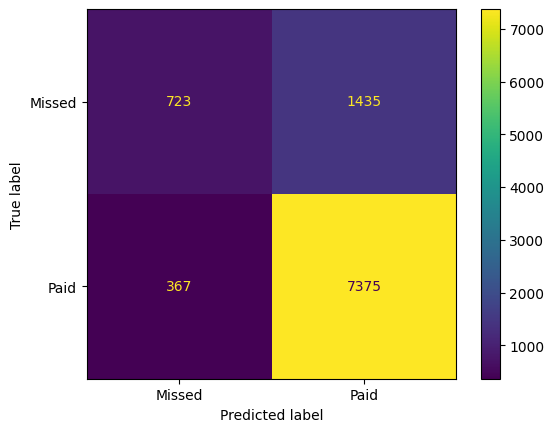

In [9]:
# 1. Set-up the model
import sklearn.neural_network
modelNN = sklearn.neural_network.MLPClassifier(random_state = 42, 
                                               hidden_layer_sizes = (30,30))

# 2. Fit the model using the training data
resultNN = modelNN.fit(featuresTrain_norm, outcomeTrain)

# 3. Predict outcomes from the training and testing data
predNNTrain = modelNN.predict(featuresTrain_norm)
predNNTest = modelNN.predict(featuresTest_norm)

# 4. Assess the fit
print(sklearn.metrics.classification_report(outcomeTrain, predNNTrain))
cmNNTest = sklearn.metrics.confusion_matrix(outcomeTest, predNNTest)
sklearn.metrics.ConfusionMatrixDisplay(cmNNTest, display_labels = modelNN.classes_).plot()
print(sklearn.metrics.classification_report(outcomeTest, predNNTest))

# Natural Language Processing

Natural language processing (NLP) models are models designed to process human language for a variety of tasks, such as sentiment analysis, summarizing text, translating text, and -- as we've seen with ChatGPT -- answer questions.

ChatGPT is a large language model that uses a version of neural network deep learning called Generative Pre-trained Transformers (GPT) that are trained on 175 billion parameters that allow the model to weigh the importance of different words relative to each other.

## Sentiment Analysis

To demonstrate how NLP models work (at a level that our laptops can handle), let's build a sentiment analysis model that can classify whether a film review is positive or negative.

First, let's import our training dataset of 8,957 reviews from IMDb.com:

In [10]:
df2 = pd.read_excel("IMDB_reduced.xlsx")
df2

,text,label
0,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
1,"I saw this film on September 1st, 2005 in Indi...",1
2,I saw a screening of this movie last night. I ...,0
3,I'M BOUT IT(1997)<br /><br />Developed & publi...,0
4,I had a recent spectator experience with The P...,0
...,...,...
8952,Best club scenes that i have seen in a long ti...,1
8953,Revenge is the theme of this Denzel Washington...,1
8954,My girlfriend has the habit of going to Blockb...,0
8955,"""Western Union"" is something of a forgotten cl...",1


For this model, our `outcome` variable is `label` (0 = negative review, 1 = positive review) and our `feature` is the review `text`. In the next code cell, create an `outcomeIMDB` and `featureIMDB` variable:

In [11]:
outcomeIMDB = df2["label"]
featureIMDB = df2["text"]

Now partition the data into training and test data sets, using `random_state = 42` and a `test_size` of 33%:

In [12]:
featureIMDBTrain, featureIMDBTest, outcomeIMDBTrain, outcomeIMDBTest = train_test_split(featureIMDB, 
                                                                          outcomeIMDB, 
                                                                          test_size = 0.33, 
                                                                          random_state = 42)

### Vectorizing the Text

Now, we need to convert our review text into numeric data. To do this, we'll use the `TfidfVectorizer()`. Similar to the scaler we used above, we first need to initialize the vectorizer:

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize.casual import casual_tokenize

vectorizer = TfidfVectorizer(max_features = 500, tokenizer = casual_tokenize)

The Term Frequency (TF) and Inverse Document Frequency (IDF) score weights each word in a review based on how many times it appears in that review and how unique or important it is across all reviews in the training data set. A higher number means it's more important.

The tokenizer we are using (`casual_tokenize`) splits the review into individual words and can handle punctuation and special characters. We are setting `max_features` to only tokenize the top 500 most important words or characters. 

Next, we transform our training and test features using the vectorizer, again similar to the scaler we used above:

In [14]:
featureIMDBTrain_v = vectorizer.fit_transform(featureIMDBTrain)
featureIMDBTest_v = vectorizer.transform(featureIMDBTest)

/opt/tljh/user/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


### Building the Model

Now we can build a neural network model using these vectorized features. Copy/paste your neural network code from above and replace the features and outcome variables as needed. Also use the following settings:

* Set the `random_state` to 42
* Use (10,10,10) for the `hidden_layer_sizes`
* Name your model `modReview`

Be sure to print out the classification reports and the confusion matrix for the test data.

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      2994
           1       0.85      0.89      0.87      3007

    accuracy                           0.87      6001
   macro avg       0.87      0.87      0.87      6001
weighted avg       0.87      0.87      0.87      6001



              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1461
           1       0.81      0.86      0.84      1495

    accuracy                           0.83      2956
   macro avg       0.83      0.83      0.83      2956
weighted avg       0.83      0.83      0.83      2956



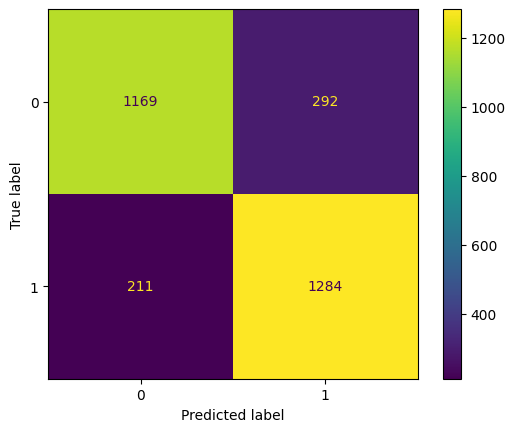

In [15]:
# 1. Set-up the model
modReview = sklearn.neural_network.MLPClassifier(random_state = 42, 
                                               hidden_layer_sizes = (10,10,10))

# 2. Fit the model using the training data
resultReview = modReview.fit(featureIMDBTrain_v, outcomeIMDBTrain)

# 3. Predict outcomes from the training and testing data
predReviewTrain = modReview.predict(featureIMDBTrain_v)
predReviewTest = modReview.predict(featureIMDBTest_v)

# 4. Assess the fit
print(sklearn.metrics.classification_report(outcomeIMDBTrain, predReviewTrain))
cmReviewTest = sklearn.metrics.confusion_matrix(outcomeIMDBTest, predReviewTest)
sklearn.metrics.ConfusionMatrixDisplay(cmReviewTest, display_labels = modReview.classes_).plot()
print(sklearn.metrics.classification_report(outcomeIMDBTest, predReviewTest))

### Using the Model

Now that we've built our model, we can use it to classify new film reviews:

In [16]:
# New film review
new_review = ["I really enjoyed the film. It kept me entertained the whole time."]

# Tokenize and vectorize the new review using the same vectorizer
new_review_v = vectorizer.transform(new_review)

# Predict sentiment on the new review
modReview.predict(new_review_v)          # predicts 0 or 1
modReview.predict_proba(new_review_v)    # provides probability of 0 or 1

array([1])

array([[0.11057952, 0.88942048]])